# Learning from experts

In [1]:
%load_ext autoreload
%autoreload 2

## Question 11
Implement the DQN algorithm. To check the algorithm, run a DQN agent with a fixed and arbitrary
epsilon ∈[0,1) against Opt(0.5) for 20’000 games – switch the 1st player after every game.

Plot average reward and average training loss for every 250 games during training. Does
the loss decrease? Does the agent learn to play Tic Tac Toe?

In [3]:
import matplotlib.pyplot as plt

def plot_average_stats(players, log_every=250, labels=None):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title(f'Average loss per {log_every} games')
    axes[0].set_xlabel('Game')
    axes[0].set_ylabel('Loss')
    axes[1].set_title(f'Average reward per {log_every} games')
    axes[1].set_xlabel('Game')
    axes[1].set_ylabel('Reward')

    for i, player in enumerate(players):
        if labels is not None:
            label = labels[i]
        else:
            label = None if callable(player.epsilon) else f"eps={player.epsilon}"
        axes[0].plot(list(range(len(player.avg_losses))), player.avg_losses, label=label)
        axes[1].plot(list(range(len(player.avg_rewards))), player.avg_rewards, label=label)

    axes[0].legend()
    axes[1].legend()

    plt.legend()
    plt.show()

### Fixed epsilon

In [ ]:
from utils import play
from deepqlearner import DeepQPlayer
from tic_env import OptimalPlayer

epsilons = [0.01, 0.1]
eps_q_players = []

for eps in epsilons:
    suboptimal_player = OptimalPlayer(epsilon=0.5)
    q_player = DeepQPlayer(epsilon=eps, target_update=500, batch_size=64, log_every=250)
    play(suboptimal_player, q_player, episodes=20000)
    eps_q_players.append(q_player)

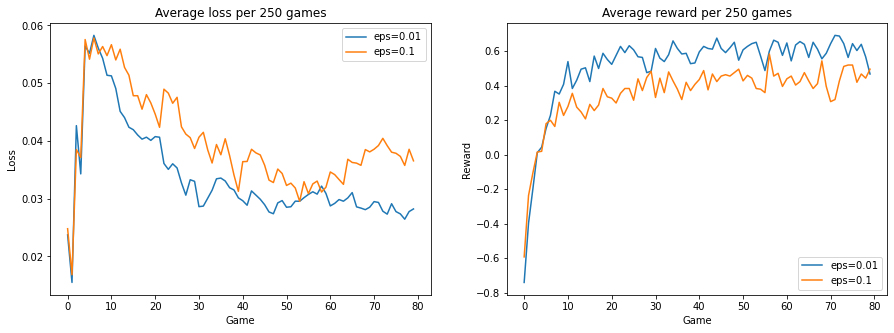

In [14]:
plot_average_stats(eps_q_players)

### Arbitrary epsilon

In [2]:
from utils import play
from deepqlearner import DeepQPlayer
from tic_env import OptimalPlayer
import random

suboptimal_player = OptimalPlayer(epsilon=0.5)
q_player = DeepQPlayer(epsilon=lambda *args, **kwargs: random.random(), target_update=500, batch_size=64, log_every=250)

play(suboptimal_player, q_player, episodes=20000)

({'wins': 9017, 'losses': 7252, 'M': 0.08825},
 {'wins': 7252, 'losses': 9017, 'M': -0.08825})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


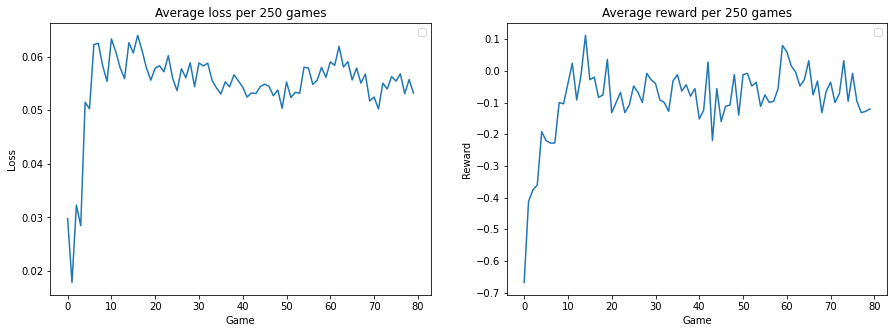

In [5]:
plot_average_stats([q_player])

## Question 12
Repeat the training but without the replay buffer and with a batch size of 1: At every
step, update the network by using only the latest transition. What do you observe?
Expected answer: A figure with two subplots showing average reward and average training loss during
training (caption length < 50 words).

### Fixed epsilon

In [1]:

from utils import play
from deepqlearner import DeepQPlayer
from tic_env import OptimalPlayer

epsilons = [0.01, 0.1]
eps_q_players = []

for eps in epsilons:
    suboptimal_player = OptimalPlayer(epsilon=0.5)
    q_player = DeepQPlayer(epsilon=eps, target_update=500, batch_size=1, log_every=250, memory_capacity=1)
    play(suboptimal_player, q_player, episodes=20000)
    eps_q_players.append(q_player)

/Users/mismayil/opt/anaconda3/envs/annproject/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 20000/20000 [03:34<00:00, 93.13it/s] 


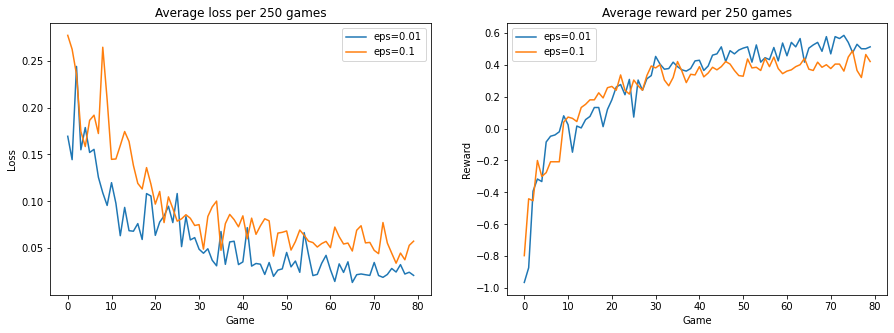

In [4]:
plot_average_stats(eps_q_players)

### Arbitrary epsilon

In [5]:
from utils import play
from deepqlearner import DeepQPlayer
from tic_env import OptimalPlayer
import random

suboptimal_player = OptimalPlayer(epsilon=0.5)
q_player = DeepQPlayer(epsilon=lambda *args, **kwargs: random.random(), target_update=500, batch_size=1, log_every=250, memory_capacity=1)

play(suboptimal_player, q_player, episodes=20000)

100%|██████████| 20000/20000 [03:38<00:00, 91.68it/s] 


({'wins': 10076, 'losses': 6681, 'M': 0.16975},
 {'wins': 6681, 'losses': 10076, 'M': -0.16975})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


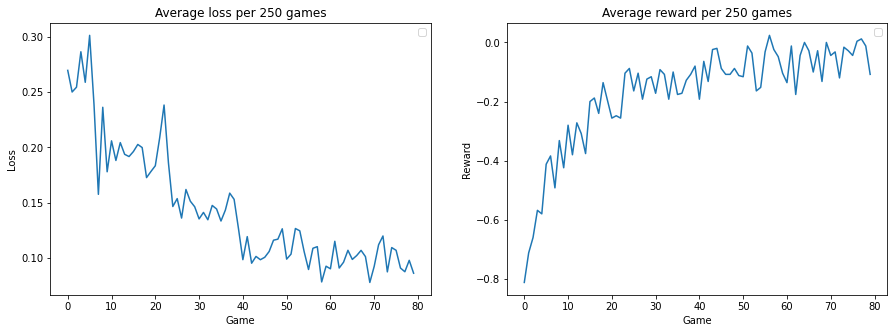

In [6]:
plot_average_stats([q_player])

## Question 13
Instead of fixing epsilon, use epsilon(n) in Equation 1. For different values of n∗, run your DQN against Opt(0.5)
for 20’000 games – switch the 1st player after every game. Choose several values of n∗from a reasonably
wide interval between 1 to 40’000 – particularly, include n∗= 1.

After every 250 games during training, compute the ‘test’ Mopt and Mrand for your agents.
Plot Mopt and Mrand over time. Does decreasing eps help training compared to having a fixed eps? What is
the effect of n∗?
Expected answer: A figure showing Mopt and Mrand over time for different values of speeds of n∗(caption
length < 250 words).

In [1]:
import matplotlib.pyplot as plt

def plot_m_values(players, log_every=250, labels=None):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title(f'M_opt per {log_every} games')
    axes[0].set_xlabel('Game')
    axes[0].set_ylabel('M_opt')
    axes[1].set_title(f'M_rand per {log_every} games')
    axes[1].set_xlabel('Game')
    axes[1].set_ylabel('M_rand')

    for i, player in enumerate(players):
        if labels is not None:
            label = labels[i]
        else:
            label = None if callable(player.epsilon) else f"eps={player.epsilon}"
        axes[0].plot(list(range(len(player.m_values["m_opt"]))), player.m_values["m_opt"], label=label)
        axes[1].plot(list(range(len(player.m_values["m_rand"]))), player.m_values["m_rand"], label=label)

    axes[0].legend()
    axes[1].legend()

    plt.legend()
    plt.show()

In [2]:
from utils import play
from deepqlearner import DeepQPlayer
from tic_env import OptimalPlayer
import random

EPS_MIN = 0.1
EPS_MAX = 0.8
n_stars = [1, 100, 1000, 10000, 40000]
n_star_players = []

for n_star in n_stars:
    optimal_player = OptimalPlayer(epsilon=0.5)
    q_player = DeepQPlayer(epsilon=lambda n, n_star=n_star: max(EPS_MIN, EPS_MAX * (1 - n / n_star)), target_update=500, log_every=250)
    play(optimal_player, q_player, episodes=20000)
    n_star_players.append(q_player)
    q_player.save_pretrained(f"n_star_players/player_n_star{n_star}")

/Users/mismayil/opt/anaconda3/envs/annproject/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 20000/20000 [15:49<00:00, 21.06it/s]  


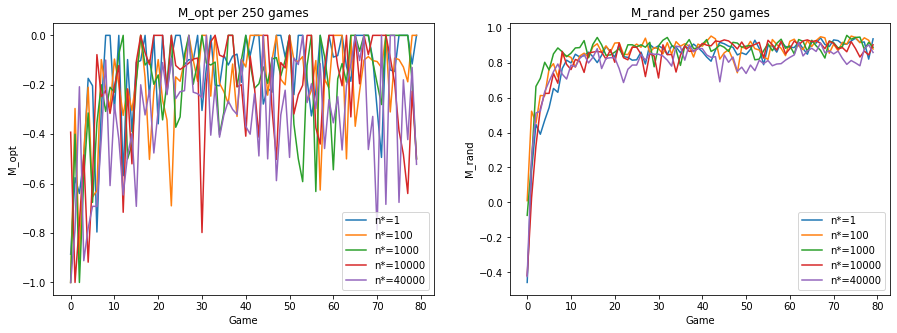

In [3]:
plot_m_values(n_star_players, labels=[f"n*={n_star}" for n_star in n_stars])

In [7]:
import numpy as np
avg_m_rands = []

for player in n_star_players:
    avg_m_rands.append(sum(player.m_values["m_rand"]) / len(player.m_values["m_rand"]))

best_n_star = n_stars[np.argmax(avg_m_rands)]
best_n_star

1000

## Question 14
Choose the best value of n∗ that you found. Run DQN against Opt(eps_opt) for different values of eps_opt for 20’000 games – switch the 1st player after every game. Choose several values of εopt from a reasonably wide interval between 0 to 1 – particularly, include eps_opt = 0.

After every 250 games during training, compute the ‘test’ Mopt and Mrand for your agents
– for each value of eps_opt. Plot Mopt and Mrand over time. What do you observe? How can you explain it?
Expected answer: A figure showing Mopt and Mrand over time for different values of eps_opt (caption length
< 250 words).

In [8]:
from utils import play
from deepqlearner import DeepQPlayer
from tic_env import OptimalPlayer
import random

EPS_MIN = 0.1
EPS_MAX = 0.8
n_star = best_n_star # 1000
epsilons = [0, 0.01, 0.1, 0.5, 1]
eps_players = []

for eps in epsilons:
    other_player = OptimalPlayer(epsilon=eps)
    q_player = DeepQPlayer(epsilon=lambda n, n_star=n_star: max(EPS_MIN, EPS_MAX * (1 - n / n_star)), target_update=500, log_every=250)
    play(other_player, q_player, episodes=20000)
    eps_players.append(q_player)
    q_player.save_pretrained(f"eps_players/player_eps{eps}")

100%|██████████| 20000/20000 [13:45<00:00, 24.23it/s]  


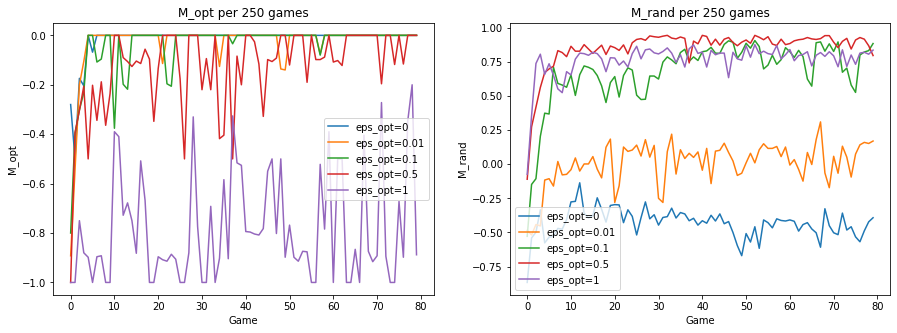

In [9]:
plot_m_values(eps_players, labels=[f"eps_opt={eps}" for eps in epsilons])

## Question 15
What are the highest values of Mopt and Mrand that you could achieve after playing 20’000
games?

In [11]:
highest_m_opt = np.max([np.max(player.m_values["m_opt"]) for player in eps_players + n_star_players])
highest_m_rand = np.max([np.max(player.m_values["m_rand"]) for player in eps_players + n_star_players])
highest_m_opt, highest_m_rand

(0.0, 0.956)